# 1. Understand Problem Statement

## 1.1 Question
1. Bagaimana pola pemesanan dan penggunaan kendaraan berdasarkan jenis (roda dua vs roda empat), jarak, jam, serta metode pembayaran?
2. Bagaimana kualitas layanan dilihat dari rating kendaraan roda dua dan roda empat?
3. Apa faktor utama yang mempengaruhi pembatalan pemesanan (perbedaan roda dua vs roda empat, peran customer vs driver, serta jarak perjalanan)?
4. Apa perbedaan pola pembatalan berdasarkan alasan yang diberikan customer dan driver?


## 1.2 Penjelasan Kolom Dataset
- <mark>**Date**</mark> → Tanggal pemesanan/perjalanan (format YYYY-MM-DD).  
- <mark>**Time**</mark> → Waktu pemesanan/perjalanan (format HH:MM:SS).  
- <mark>**Booking ID**</mark> → ID unik untuk setiap pemesanan.  
- <mark>**Booking Status**</mark> → Status pemesanan (*Completed, Cancelled by Customer, Cancelled by Driver, Incomplete, No Driver Found*).  
- <mark>**Customer ID**</mark> → ID unik pelanggan.  
- <mark>**Vehicle Type**</mark> → Jenis kendaraan (*Bike, eBike, Auto, Go Mini, Go Sedan, Premier Sedan, Uber XL*).  
- <mark>**Pickup Location**</mark> → Lokasi penjemputan.  
- <mark>**Drop Location**</mark> → Lokasi tujuan.  
- <mark>**Avg VTAT**</mark> → Waktu rata-rata kendaraan untuk tiba di lokasi penjemputan (*Vehicle Turnaround Time*).  
- <mark>**Avg CTAT**</mark> → Waktu rata-rata pelanggan untuk sampai ke destinasi dari titik jemput (*Customer Turnaround Time*).  
- <mark>**Cancelled Rides by Customer**</mark> → Penanda (1) jika dibatalkan oleh customer.  
- <mark>**Reason for cancelling by Customer**</mark> → Alasan pembatalan oleh customer.  
- <mark>**Cancelled Rides by Driver**</mark> → Penanda (1) jika dibatalkan oleh driver.  
- <mark>**Driver Cancellation Reason**</mark> → Alasan pembatalan oleh driver.  
- <mark>**Incomplete Rides**</mark> → Penanda (1) jika perjalanan tidak selesai.  
- <mark>**Incomplete Rides Reason**</mark> → Alasan perjalanan tidak selesai.  
- <mark>**Booking Value**</mark> → Nilai transaksi (fare).  
- <mark>**Ride Distance**</mark> → Jarak perjalanan (km).  
- <mark>**Driver Ratings**</mark> → Rating yang diberikan customer kepada driver (skala 1–5).  
- <mark>**Customer Rating**</mark> → Rating yang diberikan driver kepada customer (skala 1–5).  
- <mark>**Payment Method**</mark> → Metode pembayaran (*Cash, UPI, Debit Card, Credit C*


# 2. Data Gathering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ncr_ride_bookings.csv')
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


# 3. Exploratory Data Analysis (EDA)

## 3.1 Checking Data

In [3]:
# Dataset Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [4]:
print(f'Dimensions of the dataset: {df.shape}')

Dimensions of the dataset: (150000, 21)


In [5]:
# Describe the dataset for numerical column
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [6]:
# Describe the dataset for categorical column
df.describe(exclude='number')

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Reason for cancelling by Customer,Driver Cancellation Reason,Incomplete Rides Reason,Payment Method
count,150000,150000,150000,150000,150000,150000,150000,150000,10500,27000,9000,102000
unique,365,62910,148767,5,148788,7,176,176,5,4,3,5
top,2024-11-16,17:44:57,"""CNR6337479""",Completed,"""CID6715450""",Auto,Khandsa,Ashram,Wrong Address,Customer related issue,Customer Demand,UPI
freq,462,16,3,93000,3,37419,949,936,2362,6837,3040,45909


In [7]:
df.nunique()

,0
Date,365
Time,62910
Booking ID,148767
Booking Status,5
Customer ID,148788
Vehicle Type,7
Pickup Location,176
Drop Location,176
Avg VTAT,181
Avg CTAT,351


In [8]:
# Check missing values
df.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


In [9]:
# Check for duplicate values
df.duplicated().sum()

np.int64(0)

## 3.2 Distribution Data

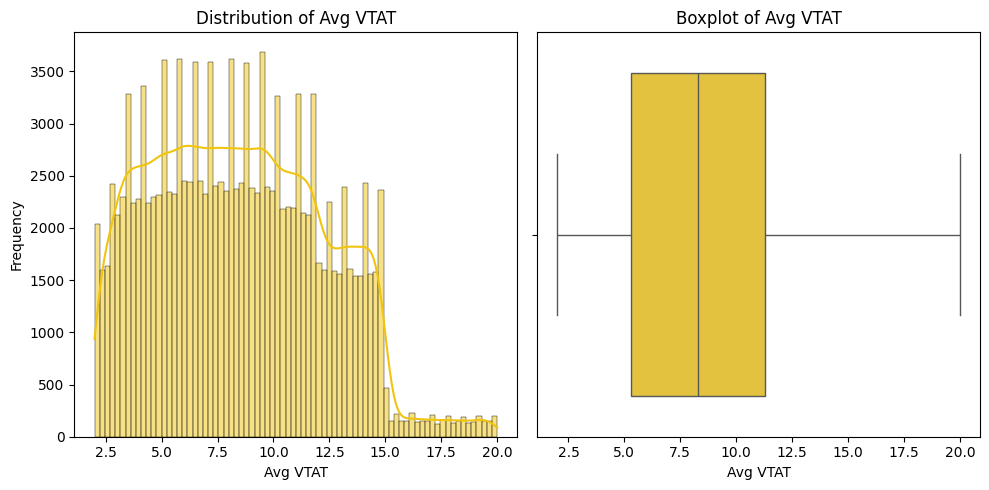

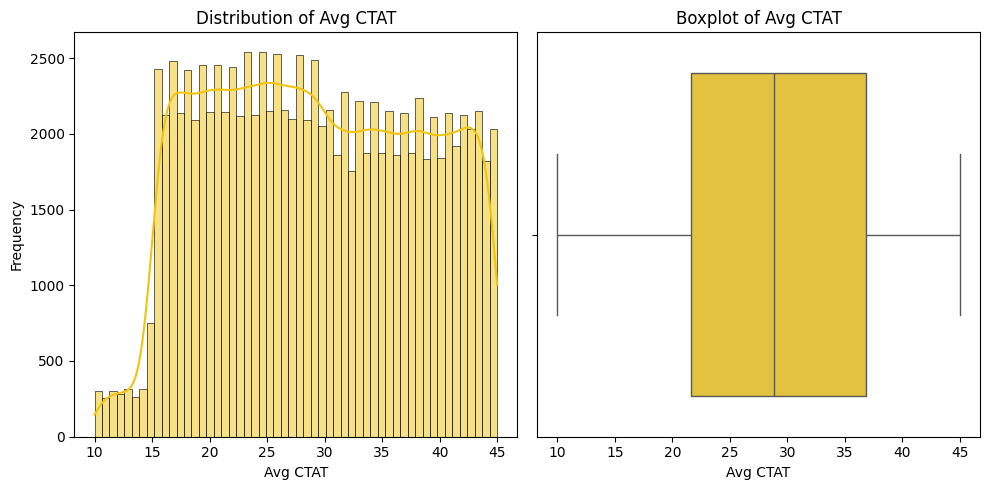

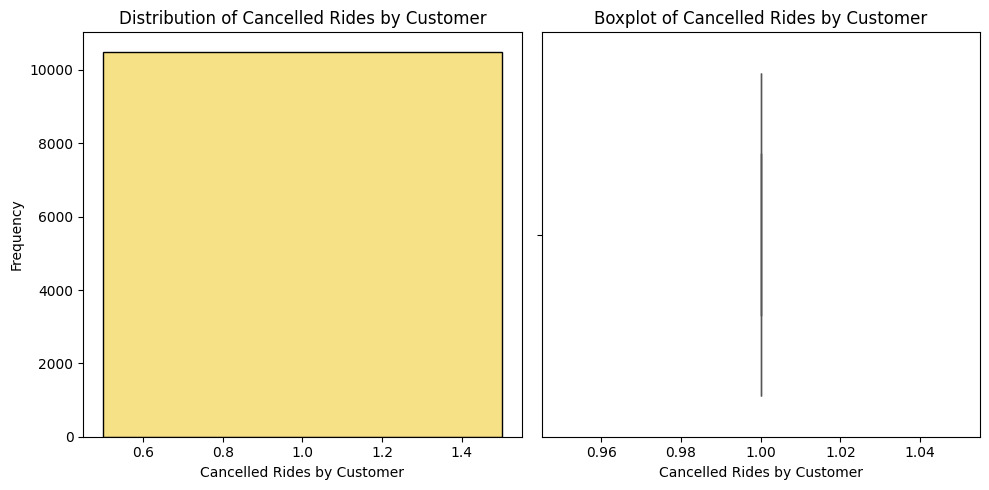

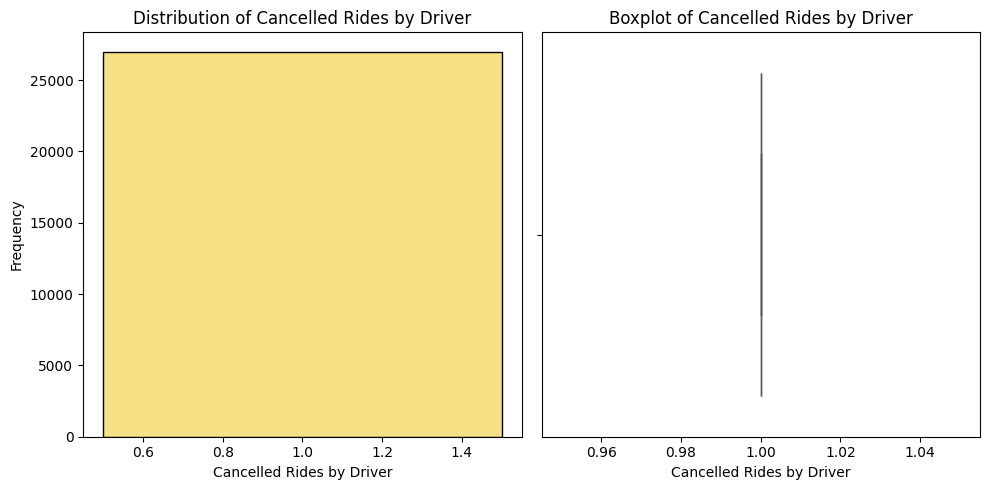

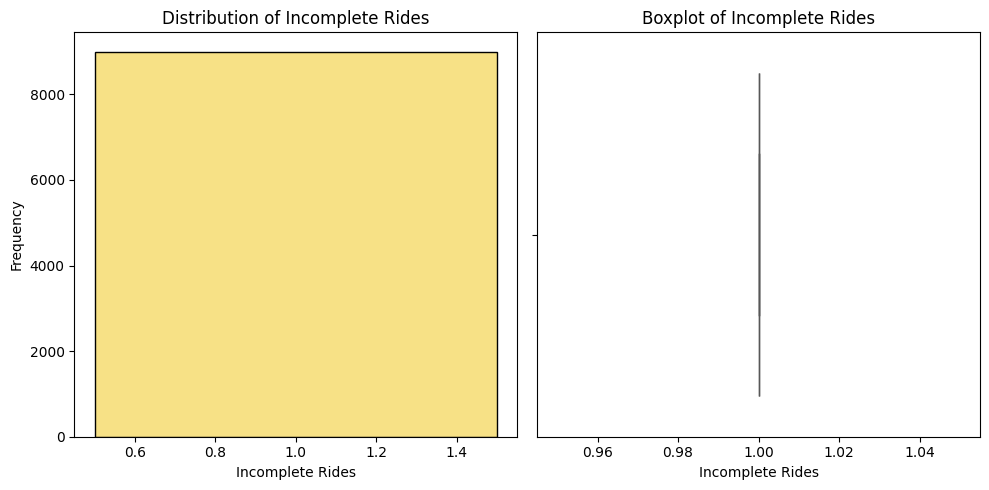

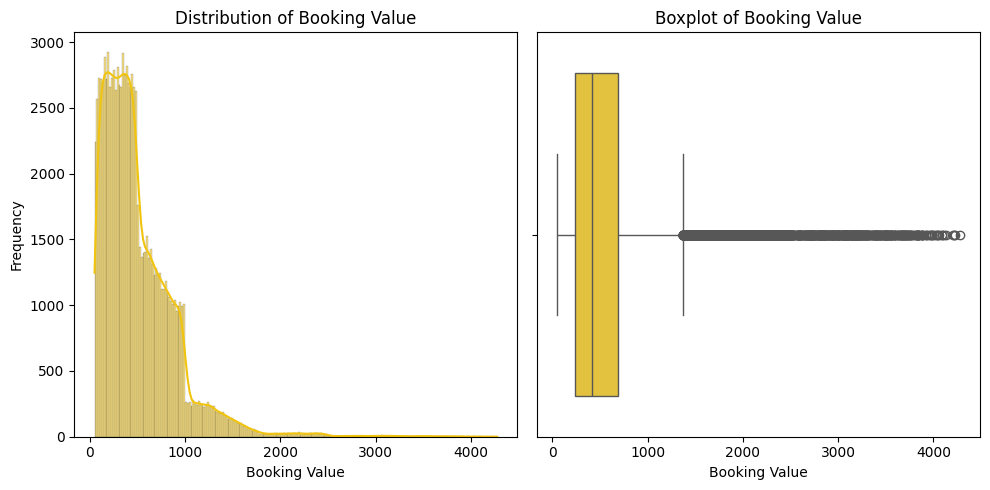

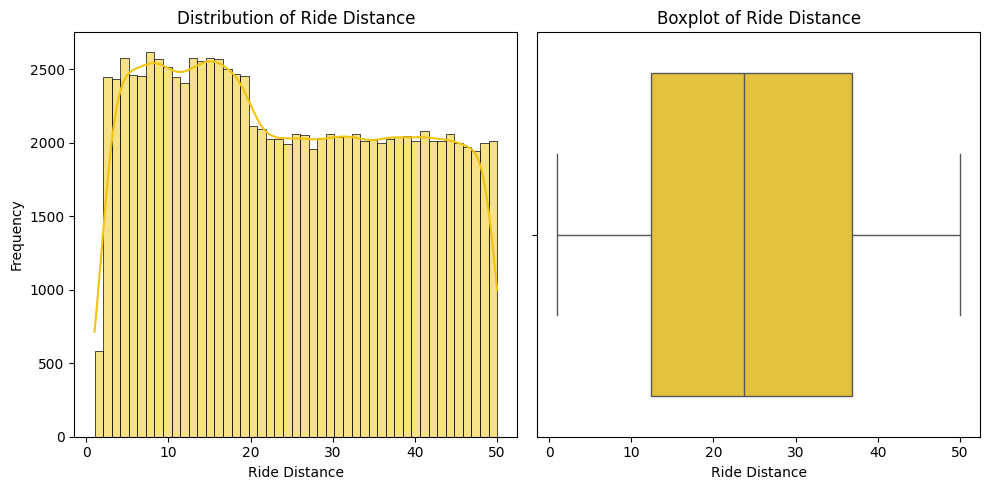

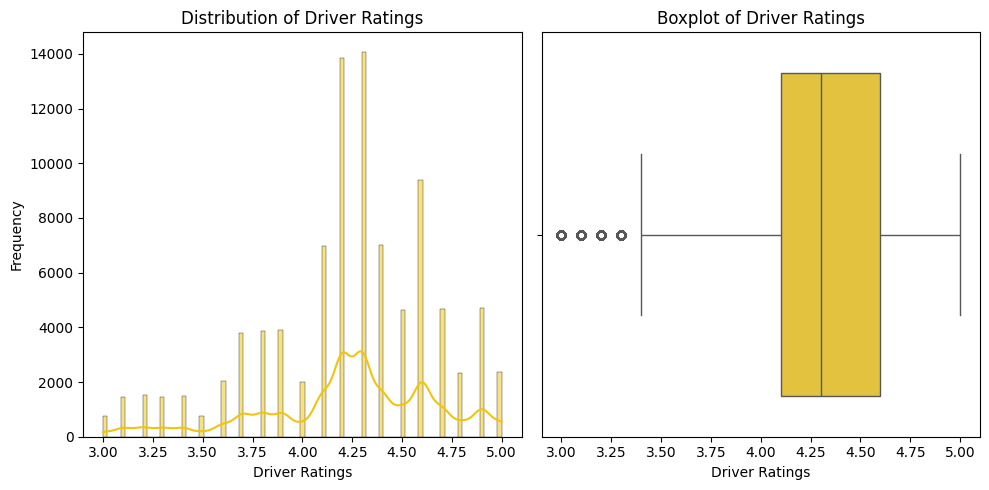

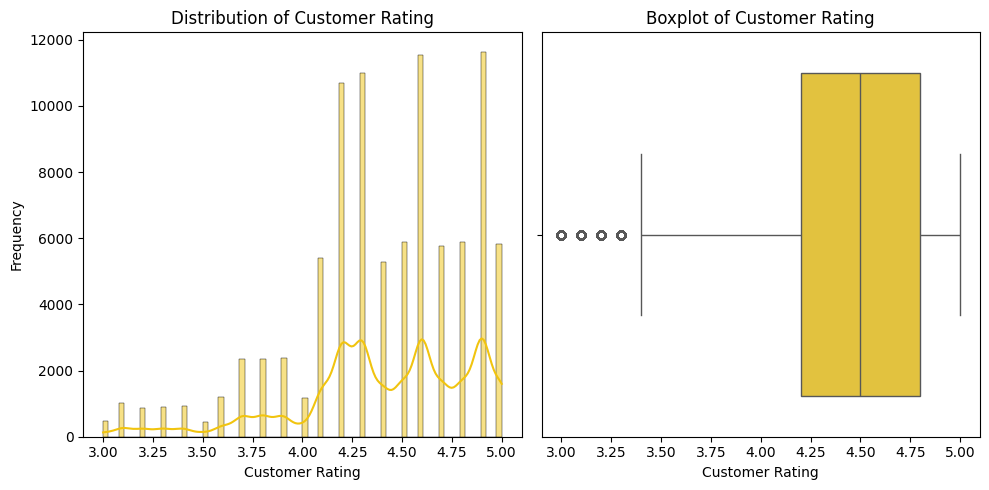

In [10]:
# Distribusi setiap kolom numerik
def plot_numerical_distribution(column):
    plt.figure(figsize=(10, 5))  # 1 baris, 2 kolom

    # Histogram (kiri)
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, color='#F1C40F')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot (kanan)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], color = "#FDD224")
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

# Plot distribution for each numerical column
for i in df.select_dtypes(include=['int64', 'float64']).columns :
    plot_numerical_distribution(i)

In [11]:
ob_cols = df.select_dtypes(include=['object']).columns

df[ob_cols].nunique()

,0
Date,365
Time,62910
Booking ID,148767
Booking Status,5
Customer ID,148788
Vehicle Type,7
Pickup Location,176
Drop Location,176
Reason for cancelling by Customer,5
Driver Cancellation Reason,4


In [12]:
df.select_dtypes(include=['object']).columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location',
       'Reason for cancelling by Customer', 'Driver Cancellation Reason',
       'Incomplete Rides Reason', 'Payment Method'],
      dtype='object')

In [13]:
cat_cols = ['Booking Status',
            'Vehicle Type',
            'Reason for cancelling by Customer',
            'Driver Cancellation Reason',
            'Incomplete Rides Reason',
            'Payment Method']

for i in cat_cols:
    print(f'Value count for {df[i].value_counts()}\n')

location = ['Pickup Location', 'Drop Location']


for i in location:
    print(f'Value count for {df[i].value_counts().head(5)}\n')


Value count for Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64

Value count for Vehicle Type
Auto             37419
Go Mini          29806
Go Sedan         27141
Bike             22517
Premier Sedan    18111
eBike            10557
Uber XL           4449
Name: count, dtype: int64

Value count for Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64

Value count for Driver Cancellation Reason
Customer related issue                 6837
The customer was coughing/sick         6751
Personal & Car related issues          6726
More than permitted people in there    6686
Name: cou

In [14]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

print('Datetime range:')
print(df['Date'].min())
print(df['Date'].max())

print('\nTime range:')
print(df['Time'].min())
print(df['Time'].max())

Datetime range:
2024-01-01 00:00:00
2024-12-30 00:00:00

Time range:
00:00:00
23:59:59


## 3.3 Diagnostic Analytics

### 3.3.1 Diagnostic Missing Value

In [15]:
col_missing = df.isnull().sum()
col_missing[col_missing > 0]

,0
Avg VTAT,10500
Avg CTAT,48000
Cancelled Rides by Customer,139500
Reason for cancelling by Customer,139500
Cancelled Rides by Driver,123000
Driver Cancellation Reason,123000
Incomplete Rides,141000
Incomplete Rides Reason,141000
Booking Value,48000
Ride Distance,48000


Missing Value pada setiap kolomnya sangat banyak, kita perlu mendiagnostik lebih dalam lagi untuk memahami konteks missing valuenya, bisa jadi karena emang tidak ada datanya ataupun kesalahan data. Untuk Analitik lebih dalam lagi, gunakan kolom 'Booking Status' sebagai acuan.

In [16]:
# Booking Status
Complete_df = df[df['Booking Status'] == 'Completed']
Cancelled_by_Driver = df[df['Booking Status'] == 'Cancelled by Driver']
No_Driver_Found = df[df['Booking Status'] == 'No Driver Found']
Cancelled_by_Customer = df[df['Booking Status'] == 'Cancelled by Customer']
Incomplete_df = df[df['Booking Status'] == 'Incomplete']

def check_missing(df):
    return df.columns[df.isnull().sum() > 0].tolist()

# Missing Value for All Booking Status
print('\nMissing Value for Complete')
print(check_missing(Complete_df))

print('\nMissing Value For Cancelled by Driver')
print(check_missing(Cancelled_by_Driver))

print('\nMissing Value For No Driver Found')
print(check_missing(No_Driver_Found))

print('\nMissing Value For Cancelled by Customer')
print(check_missing(Cancelled_by_Customer))

print('\nMissing Value For Incomplete')
print(check_missing(Incomplete_df))

print(f'\nShape of Complete_df : {Complete_df.shape}')
print(f'\nShape of Cancelled_by_Driver : {Cancelled_by_Driver.shape}')
print(f'\nShape of No_Driver_Found : {No_Driver_Found.shape}')
print(f'\nShape of Cancelled_by_customer : {Cancelled_by_Customer.shape}')
print(f'\nShape of Incomplete_df : {Incomplete_df.shape}')


Missing Value for Complete
['Cancelled Rides by Customer', 'Reason for cancelling by Customer', 'Cancelled Rides by Driver', 'Driver Cancellation Reason', 'Incomplete Rides', 'Incomplete Rides Reason']

Missing Value For Cancelled by Driver
['Avg CTAT', 'Cancelled Rides by Customer', 'Reason for cancelling by Customer', 'Incomplete Rides', 'Incomplete Rides Reason', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Payment Method']

Missing Value For No Driver Found
['Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 'Reason for cancelling by Customer', 'Cancelled Rides by Driver', 'Driver Cancellation Reason', 'Incomplete Rides', 'Incomplete Rides Reason', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Payment Method']

Missing Value For Cancelled by Customer
['Avg CTAT', 'Cancelled Rides by Driver', 'Driver Cancellation Reason', 'Incomplete Rides', 'Incomplete Rides Reason', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Custo

In [17]:
print(df['Cancelled Rides by Customer'].unique())
print(df['Cancelled Rides by Driver'].unique())
print(df['Incomplete Rides'].unique())

[nan  1.]
[nan  1.]
[nan  1.]


**Insight :**
- Nilai unik pada kolom "Canceled Rides by Customer/Driver", 1 diartikan sebagai 'Ya' (dibatalkan), NaN diartikan sebagai perjalanan berhasil atau tidak berhasil karena alasan lain
- Nilai unik pada kolom "Incomplete Rides", 1 diartikan perjalanan tidak selesai, NaN diartikan sebagai perjalanan berhasil atau tidak berhasil karena alasan lain

### 3.2.2 Diagnostic Incomplete Rides

In [18]:
print(Complete_df['Incomplete Rides'].unique())
print(Incomplete_df['Incomplete Rides'].unique())
print(Cancelled_by_Driver['Incomplete Rides'].unique())
print(No_Driver_Found['Incomplete Rides'].unique())
print(Cancelled_by_Customer['Incomplete Rides'].unique())

[nan]
[1.]
[nan]
[nan]
[nan]


1 artinya terjadi pembatalan pemesanan, hanya saja, cuma ada di bagian status 'Incomplete'. Untuk yang 'Completed' dikatakan NaN itu sudah benar, karena status perjalanannya berhasil

In [19]:
print(Complete_df['Incomplete Rides Reason'].unique())
print(Incomplete_df['Incomplete Rides Reason'].unique())
print(Cancelled_by_Driver['Incomplete Rides Reason'].unique())
print(No_Driver_Found['Incomplete Rides Reason'].unique())
print(Cancelled_by_Customer['Incomplete Rides Reason'].unique())

[nan]
['Vehicle Breakdown' 'Other Issue' 'Customer Demand']
[nan]
[nan]
[nan]


**Insight :**
- Nilai unik hanya ada pada status "Incomplete", itu wajar karena 'Incomplete Rides Reason' hanya untuk perjalanan yang tidak selesai

### 3.3.3 Diagnostic Cancelled Driver and Customer

In [20]:
col_cancel = ['Cancelled Rides by Customer','Reason for cancelling by Customer', 'Cancelled Rides by Driver', 'Driver Cancellation Reason']

datasets = {
    "Complete": Complete_df,
    "Incomplete": Incomplete_df,
    "Cancelled by Driver" : Cancelled_by_Driver,
    'No Driver Found' : No_Driver_Found,
    'Cancelled by Customer' : Cancelled_by_Customer
}

for name, subset in datasets.items():
    print(f"\n{name}")
    for col in col_cancel:
        print(subset[col].unique())



Complete
[nan]
[nan]
[nan]
[nan]

Incomplete
[nan]
[nan]
[nan]
[nan]

Cancelled by Driver
[nan]
[nan]
[1.]
['Personal & Car related issues' 'Customer related issue'
 'More than permitted people in there' 'The customer was coughing/sick']

No Driver Found
[nan]
[nan]
[nan]
[nan]

Cancelled by Customer
[1.]
['Driver is not moving towards pickup location' 'Driver asked to cancel'
 'AC is not working' 'Change of plans' 'Wrong Address']
[nan]
[nan]


**Insight :**
- Nilai unik pada status "Cancelled by Driver" adalah NaN pada kolom "Cancelled Rides by Customer"dan "Reason for cancelling by Customer" , artinya itu wajar karena nilai uniknya berfokus pada pembatalan dari driver saja
- Nilai unik pada status "Cancelled by Customer" adalah NaN pada kolom "Cancelled Rides by Driver" dan "Driver Cancellation Reason" , artinya itu wajar karena nilai uniknya berfokus pada pembatalan dari pelanggan saja
- Nilai unik pada status "Complete" dan "Incomplete" hanya NaN, artinya tidak ada hubungannya dengan pembatalan dari pelanggan dan driver, ini hanya untuk memastikan nilai uniknya tidak ada anomali.

### 3.3.4 Diagnostic Ratings

In [21]:
cols_rating = ['Driver Ratings' ,'Customer Rating']
for name, subset in datasets.items():
    print(f"\n{name}")
    for col in cols_rating:
        print(subset[col].isnull().sum())



Complete
0
0

Incomplete
9000
9000

Cancelled by Driver
27000
27000

No Driver Found
10500
10500

Cancelled by Customer
10500
10500


**Insight :**
- Pelanggan yang status perjalanannya berhasil, memberikan rating kepada driver dan driver juga memberikan rating kepada pelanggannya.
- Semua status perjalanan lain, mulai dari perjalanan yang tidak berhasil, tidak ada Driver, maupun dicancel Pelanggan atau Driver tidak terdapat rating.

### 3.3.5 Diagnostic VTAT and CTAT

In [22]:
cols_avg = ['Avg VTAT', 'Avg CTAT']
for name, subset in datasets.items():
    print(f"\n{name}")
    for col in cols_avg:
        print(subset[col].isnull().sum())


Complete
0
0

Incomplete
0
0

Cancelled by Driver
0
27000

No Driver Found
10500
10500

Cancelled by Customer
0
10500


**Insight :**
- Status 'Complete' tidak memiliki NaN (missing values) pada Avg VTAT maupun Avg CTAT, artinya driver sudah sampai titik jemput dan customer sudah sampai ke tujuan.
- Status 'Incomplete' tidak memiliki Nan (missing values) pada Avg VTAT maupun Avg CTAT, artinya driver sudah sampai titik jemput dan perjalanan sudah dilakukan meski tidak sampai ke destinasi tujuan. Dengan kata lain, perjalanan sudah dilakukan dengan durasi tertentu meski tidak sampai di destinasi yang tertulis di aplikasi.
- Status 'Cancelled by Driver' dan 'Cancelled by Customer' memiliki NaN (missing values) pada AVG CTAT karena perjalanan gagal dilakukan sehingga tidak ada durasi perjalanan.
- Status 'No Driver Found' memiliki NaN (missing values) pada AVG VTAT dan AVG CTAT, artinya perjalanan tidak terjadi karena tidak ada driver yang mengambil orderan tersebut sehingga tidak ada rata-rata durasi penjemputan maupun pengantaran.

### 3.3.6 Diagnostic Payment Method

In [23]:
cols_payment = ['Payment Method']
for name, subset in datasets.items():
    print(f"\n{name}")
    for col in cols_payment:
        print(subset[col].isnull().sum())


Complete
0

Incomplete
0

Cancelled by Driver
27000

No Driver Found
10500

Cancelled by Customer
10500


**Insight :**
- Status 'Cancelled by Driver/Customer' memiliki NaN, artinya perjalanan tersebut tidak terjadi sehingga tidak ada pembayaran apapun
- Status 'No Driver Found' memiliki NaN, karena tidak ada pengemudi berarti tidak ada perjalanan juga, jadi tidak ada pembayaran
- Status 'Complete' tidak memiliki NaN artinya mereka sudah melakukan pembayaran dan perjalanan sudah berhasil
- Status 'Incomplete' tidak memiliki NaN artinya mereka tetap ditagih pembayaran (entah full charge atau half charge) walaupun perjalanan tidak selesai

### 3.3.7 Diagnostic Booking Value

In [24]:
booking_value = ['Booking Value']
for name, subset in datasets.items():
    print(f"\n{name}")
    for col in booking_value:
        print(subset[col].isnull().sum())


Complete
0

Incomplete
0

Cancelled by Driver
27000

No Driver Found
10500

Cancelled by Customer
10500


**Insight**:
- Status 'Complete' dan 'Incomplete' tidak memiliki missing value pada kolom Booking Value, hal ini karena tetap ada harga (fare) yang harus dibayarkan pelanggan baik sampai destinasi tujuan ataupun setengah perjalanan (incomplete)
- Status 'Cancelled by Driver', 'Cancelled by Customer', dan 'No Driver Found' memiliki NaN (missing values) pada Booking Value karena tidak ada perjalanan yang dilakukan sehingga tidak ada biaya (fare) yang harus dikeluarkan pelanggan.

### 3.3.7 Conculsion

Dari hasil diagnostik per kolomnya, missing value (NaN) masih dikatakan wajar/bukan kesalahan data, karena emang masih sesuai dengan konteks per kolomnya.

# 4. Data Cleaning

In [25]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

In [26]:
# Penambahan kolom baru untuk tahun, bulan, dan hari
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Penambahan kolom baru untuk Jam, Menit, dan Detik
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df['Second'] = df['Time'].dt.second

# Penambahan kolom baru untuk tipe kendaraan roda dua (2W), roda tiga (3W), roda empat (4W)
def categorize_vehicle(v):
    if v in ["Bike","eBike"]:
        return "2W"
    elif v in ["Go Mini","Go Sedan","Premier Sedan","Uber XL"]:
        return "4W"
    elif v == "Auto":
        return "3W"
    return "Other"
df["Vehicle_Category"] = df["Vehicle Type"].apply(categorize_vehicle)

df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Driver Ratings,Customer Rating,Payment Method,Year,Month,Day,Hour,Minute,Second,Vehicle_Category
0,2024-03-23,1900-01-01 12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,2024,3,23,12,29,38,2W
1,2024-11-29,1900-01-01 18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,UPI,2024,11,29,18,1,39,4W
2,2024-08-23,1900-01-01 08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,4.9,4.9,Debit Card,2024,8,23,8,56,10,3W
3,2024-10-21,1900-01-01 17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,4.6,5.0,UPI,2024,10,21,17,17,25,4W
4,2024-09-16,1900-01-01 22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,4.1,4.3,UPI,2024,9,16,22,8,0,2W


# 5. Data Visualization

## 5.1 Monthly Booking Trend

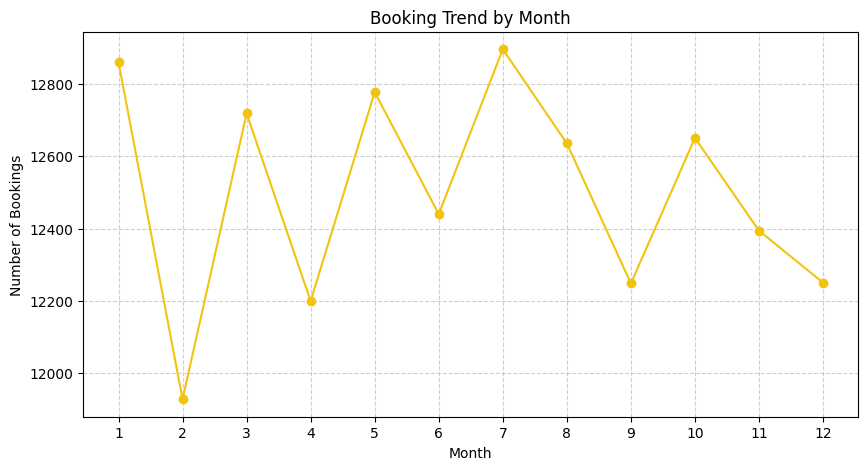

In [50]:
booking_trend_month = df.groupby('Month')['Booking ID'].count()

plt.figure(figsize=(10,5))
plt.plot(booking_trend_month.index, booking_trend_month.values, marker='o', color='#F1C40F')
plt.title("Booking Trend by Month")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(range(1,13))
plt.show()

**Insight :**
- Bulan Januari mengalami penurunan jumlah pembookingan yang sangat drastis hingga bulan Februari.
- Februari mengalami kenaikan jumlah pembookingan hingga bulan Maret
- Untuk bulan selanjutnya mengalami hal yang selalu sama yaitu turun dan naiknya jumlah pembookingan.

## 5.2 Trend Revenue by Month

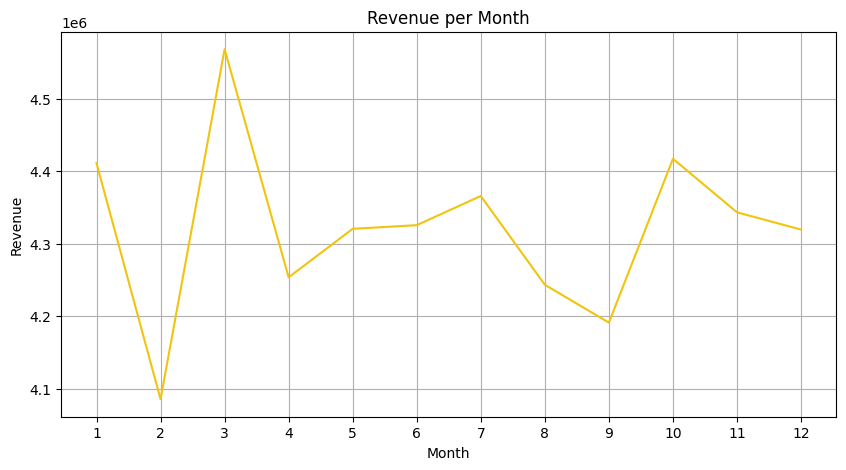

In [28]:
revenue_uber = df.groupby('Month')['Booking Value'].sum()

plt.figure(figsize=(10,5))
plt.plot(revenue_uber.index, revenue_uber.values, color = '#F1C40F')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue per Month')
plt.xticks(range(1,13))
plt.grid()
plt.show()

**Insight :**
- Dari hasil visualisasi tersebut kita dapat melihat, bahwa bulan januari mengalami penurunan revenue yang signifikan.
- Bulan Februari mengalami kenaikan revenue yang signifikan.
- Maret mengalami penurunan yang signifikan hingga bulan april
- April hingga Juli mengalami kenaikan secara stabil
- Juli hingga September mengalami penurunan lagi
- September mengalami penaikan lagi
- Oktober hingga Desember mengalami penurunan lagi

Performa Bisnis uber mengalami naik dan turunnya revenue, Bulan februari menjadi peningkatan revenue yang sangat drastis dan Bulan Maret menjadi penurunan revenue yang sangat drastis. Hal ini tentu kita harus mencari tahu apa yang membuat bisnis uber mengalami penurunan revenuenya.

## 5.3 Most Booked Vehicle Type



,count
Vehicle Type,
Auto,37419
Go Mini,29806
Go Sedan,27141
Bike,22517
Premier Sedan,18111
eBike,10557
Uber XL,4449


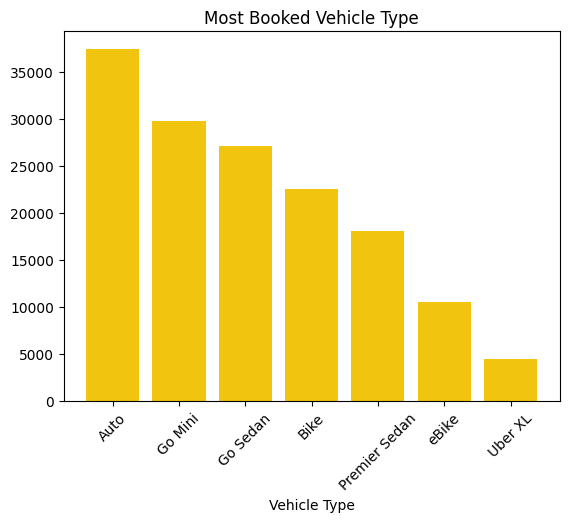

In [29]:
best_vehicle = df['Vehicle Type'].value_counts()
display(best_vehicle)
plt.bar(best_vehicle.index, best_vehicle.values, color='#F1C40F')
plt.xticks(rotation=45)
plt.xlabel('Vehicle Type')
plt.title('Most Booked Vehicle Type')
plt.show()

**Insight :**
- Kendaraan tipe Auto (Bajaj) menjadi yang paling banyak di pesan oleh pelanggan Uber
- Kendaraan tipe Uber XL menjadi yang paling sedikit di pesan oleh pelanggan Uber

## 5.4 Top Vehicle Type by Rating

### 5.4.1 By Customer Rating

,Customer Rating
Vehicle Type,
Go Sedan,4.410
Uber XL,4.405
Bike,4.404
eBike,4.404
Go Mini,4.404
Premier Sedan,4.403
Auto,4.402


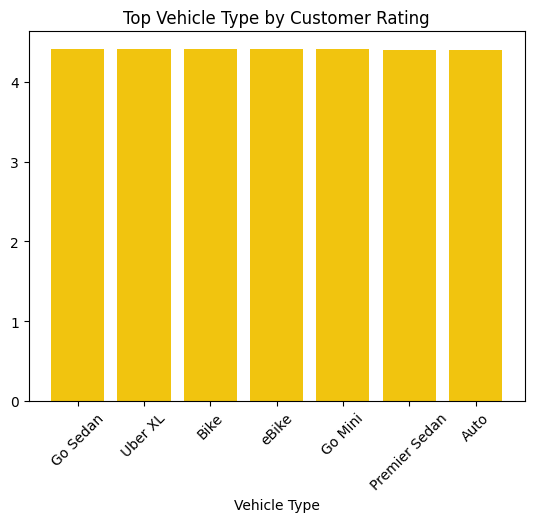

In [30]:
customer_rate = df.groupby('Vehicle Type')['Customer Rating'].mean().round(3).sort_values(ascending=False)
display(customer_rate)

plt.bar(customer_rate.index, customer_rate.values, color='#F1C40F')
plt.xticks(rotation=45)
plt.xlabel('Vehicle Type')
plt.title('Top Vehicle Type by Customer Rating')
plt.show()

**Insight :**
- Kendaraan tipe Go Sedan menjadi rata rata rating yang paling tinggi di antara yang tipe kendaraan lain
- Kendaraan tipe Auto menjadi rata rata rating yang paling rendah di antara yang tipe kendaraan lain

Kemungkinan Go Sedan menjadi rata rata yang paling tinggi, karena penggunaan mobil secara umum lebih nyaman dan aman untuk pelanggan uber.

### 5.4.2 By Driver Rating

,Driver Ratings
Vehicle Type,
Uber XL,4.238
Premier Sedan,4.235
Auto,4.232
Go Sedan,4.232
Bike,4.230
Go Mini,4.228
eBike,4.226


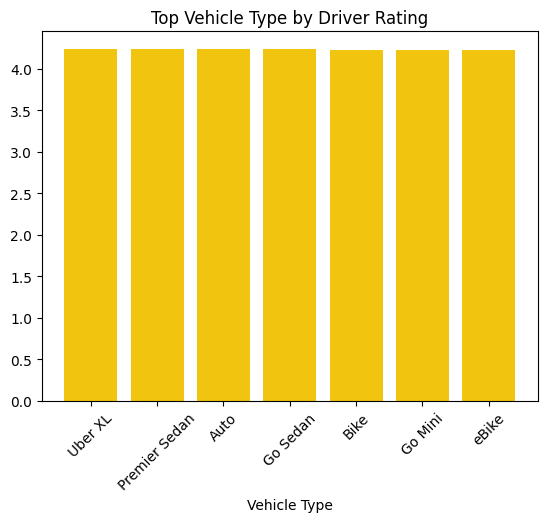

In [31]:
driver_rate = df.groupby('Vehicle Type')['Driver Ratings'].mean().round(3).sort_values(ascending=False)
display(driver_rate)

plt.bar(driver_rate.index, driver_rate.values, color='#F1C40F')
plt.xticks(rotation=45)
plt.xlabel('Vehicle Type')
plt.title('Top Vehicle Type by Driver Rating')
plt.show()

**Insight :**
- Kendaraan tipe UberXL menjadi rata rata rating pengemudi yang paling tinggi di antara yang tipe kendaraan lain
- Kendaraan tipe eBike menjadi rata rata rating pengemudi yang paling rendah di antara yang tipe kendaraan lain

Kemungkinan UberXL menjadi rata rata yang paling tinggi, karena penggunaan mobil ukuran XL menawarkan mobil dengan CC yang besar dan fasilitas yang lebih lengkap/

## 5.5 Vehicle Type by Total Profit

,Booking Value
Vehicle Type,
Auto,12878422.0
Go Mini,10338496.0
Go Sedan,9369719.0
Bike,7837697.0
Premier Sedan,6275332.0
eBike,3618485.0
Uber XL,1528032.0


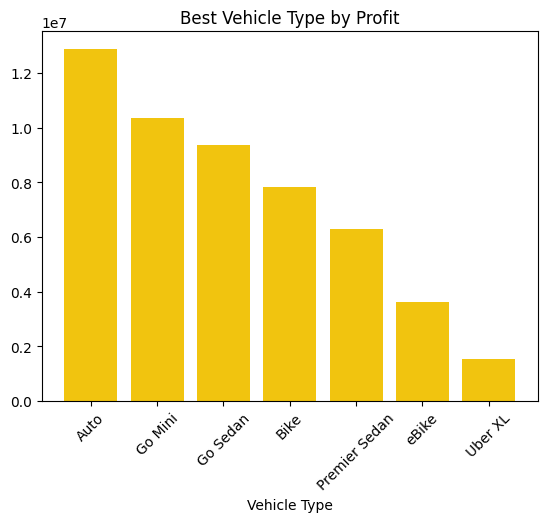

In [32]:
profit_vehicle = df.groupby('Vehicle Type')['Booking Value'].sum().sort_values(ascending=False)
display(profit_vehicle)

plt.bar(profit_vehicle.index, profit_vehicle.values, color='#F1C40F')
plt.xticks(rotation=45)
plt.xlabel('Vehicle Type')
plt.title('Best Vehicle Type by Profit')
plt.show()

**Insight :**
- Auto (Bajaj) menjadi yang paling banyak mendapatkan profit di uber
- Uber XL menjadi yang paling sedikit mendapatkan profit di uber

## 5.6 Vehicle Type by Average Distance

,Ride Distance
Vehicle Type,
eBike,24.99
Bike,24.65
Auto,24.62
Go Mini,24.61
Go Sedan,24.61
Premier Sedan,24.60
Uber XL,24.40


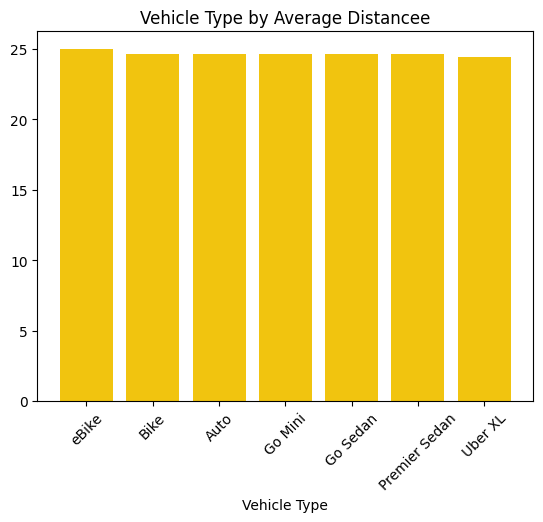

In [33]:
avg_distance = df.groupby('Vehicle Type')['Ride Distance'].mean().round(2).sort_values(ascending=False)
display(avg_distance)

plt.bar(avg_distance.index, avg_distance.values, color='#F1C40F')
plt.xticks(rotation=45)
plt.xlabel('Vehicle Type')
plt.title('Vehicle Type by Average Distancee')
plt.show()

**Insight :**
- Kendaraan tipe (eBike) menjadi rata rata jarak perjalanan yang paling jauh
- Kendaraan tipe UberXL menjadi rata rata jarak perjalanan yang paling dekat

Secara biaya, eBike jauh lebih murah dibandingakn UberXL, karena menggunakan kendaraan roda empat akan lebih mahal, otomatis mayoritas lebih memilih untuk menggunakan kendaraan roda dua.



## 5.7 Revenue by Payment Method

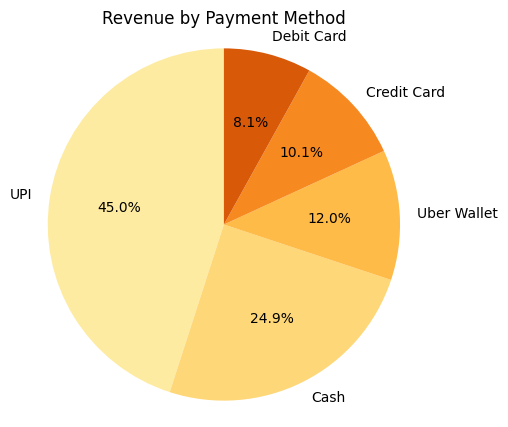

In [56]:
payment_value = df.groupby('Payment Method')['Booking Value'].sum().sort_values(ascending=False)
colors = plt.cm.YlOrBr([0.2, 0.3, 0.4, 0.55, 0.7, 0.85, 0.95])

plt.figure(figsize=(5,5))
plt.pie(payment_value.values, labels=payment_value.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')
plt.title('Revenue by Payment Method')
plt.show()

**Insight :**
- Metode pembayaran dengan UPI menjadi pembayaran yang sering dilakukan oleh para pelanggan uber
- Metode pembayaran dengan debit card menjadi pembayaran yang paling sedikit dilakukan oleh para customer

Pembayaran secara debit akan memakan waktu lebih lama dalam pembayaran, sehingga debit card kurang efisien untuk pembayaran yang cepat

## 5.8 Average Bookings by Hour

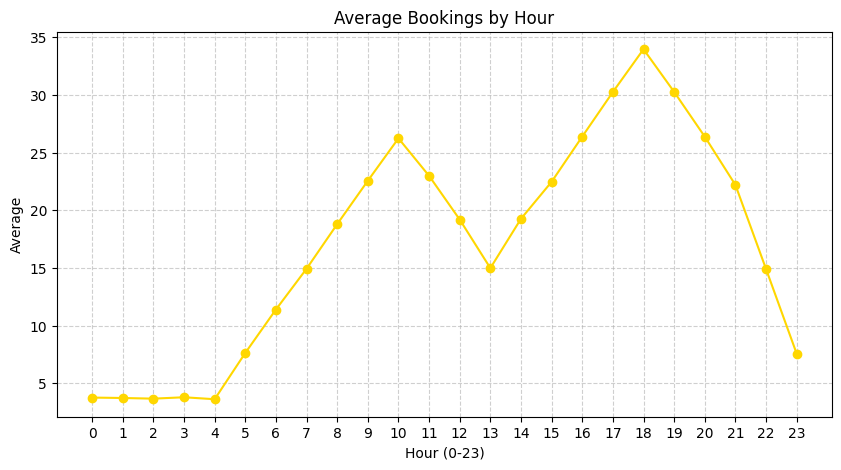

In [35]:
avg_booking_per_hour = df.groupby('Hour')['Booking ID'].count() / df['Date'].nunique()

# Plot line chart
plt.figure(figsize=(10,5))
plt.plot(avg_booking_per_hour.index, avg_booking_per_hour.values, marker='o', color='gold')
plt.title("Average Bookings by Hour")
plt.xlabel("Hour (0-23)")
plt.ylabel("Average")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(range(0,24))
plt.show()

**Insight :**
- Jam 00.00 - 04.00, pembookingan uber sangat rendah, menunjukan karena masih jam tidur
- Jam 04.00 - 10.00, pembookingan uber naik drastis, mengindikasikan orang sudah mulai beraktivitas atau berangkat kerja
- Jam 10.00 - 13.00, pembookingan uber mengalami penurunan, kemungkinan para pengemudi sedang beristirahat makan siang
- Jam 13.00 - 18.00, pembookingan uber mengalami kenaikan yang drastis lagi, jam siang menunjukan sedang waktunya aktif dalam beraktivitas dan jam sore menunjukan jam pulang kerja
- Jam 18.00 - 23.00, pembookinga uber menurun secara drastis, tetapi jam 18.00-21.00 masih diangkat tinggi menunjukan jam pulang kerja masih berlangsung, dan emang ada yang sudah sampai dirumah masing-masing.


## 5.9 Cancellation Reasons (Driver)

In [36]:
Cancel_3W = df[df['Vehicle_Category'] == '3W']
Cancel_2W = df[df['Vehicle_Category'] == '2W']
Cancel_4W = df[df['Vehicle_Category'] == '4W']

cancel_reason_3w = Cancel_3W['Driver Cancellation Reason'].value_counts().sort_values(ascending=True)
display(cancel_reason_3w)

cancel_reason_2w = Cancel_2W['Driver Cancellation Reason'].value_counts().sort_values(ascending=True)
display(cancel_reason_3w)

cancel_reason_4w = Cancel_4W['Driver Cancellation Reason'].value_counts().sort_values(ascending=True)
display(cancel_reason_4w)


,count
Driver Cancellation Reason,
Personal & Car related issues,1620
More than permitted people in there,1632
The customer was coughing/sick,1671
Customer related issue,1720


,count
Driver Cancellation Reason,
Personal & Car related issues,1620
More than permitted people in there,1632
The customer was coughing/sick,1671
Customer related issue,1720


,count
Driver Cancellation Reason,
The customer was coughing/sick,3561
More than permitted people in there,3585
Personal & Car related issues,3612
Customer related issue,3615


### 5.9.1 Cancellation Driver (Driver) - 3W

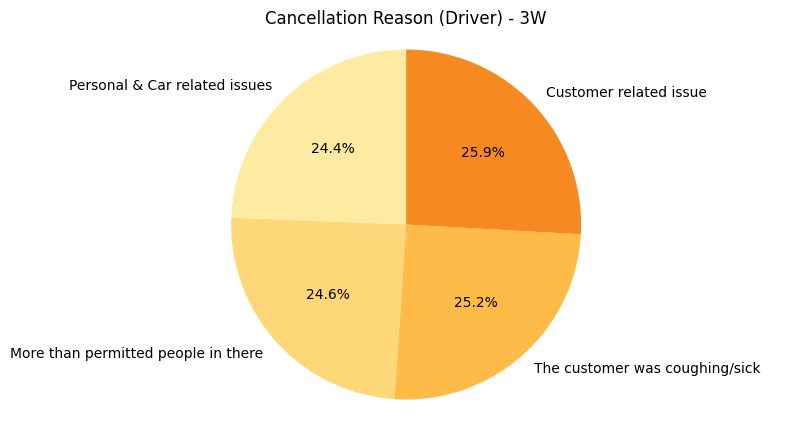

In [37]:
colors = plt.cm.YlOrBr([0.2, 0.3, 0.4, 0.55, 0.7, 0.85, 0.95])
plt.figure(figsize=(10,5))
plt.pie(cancel_reason_3w.values, labels=cancel_reason_3w.index, autopct='%1.1f%%', startangle=90,colors=colors)
plt.axis('equal')
plt.title('Cancellation Reason (Driver) - 3W')
plt.show()

### 5.9.2 Cancellation Driver (Driver) - 4W

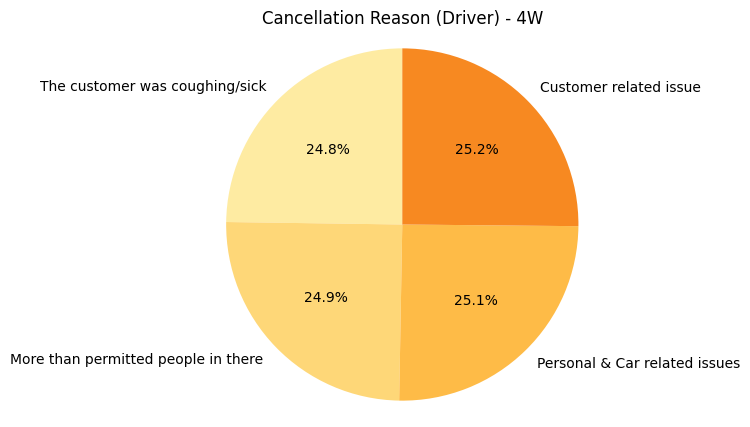

In [38]:
plt.figure(figsize=(5,5))
plt.pie(cancel_reason_4w.values, labels=cancel_reason_4w.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')
plt.title('Cancellation Reason (Driver) - 4W')
plt.show()

### 5.9.3 Cancellation Reason (Driver) - 2W

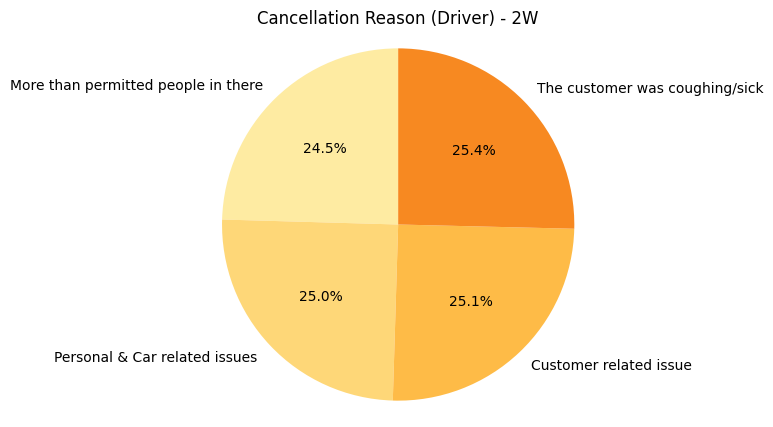

In [39]:
plt.figure(figsize=(5,5))
plt.pie(cancel_reason_2w.values, labels=cancel_reason_2w.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Cancellation Reason (Driver) - 2W')
plt.axis('equal')
plt.show()

**Insight :**
- Alasan pembatalan driver paling banyak untuk roda tiga adalah adanya masalah terhadap pelanggan sebanyak 25,9% dari pembatalan pembokingan roda tiga
- Alasan pembatalan driver paling banyak untuk roda empat adalah adanya masalah terhadap pelanggan sebanyak 25,2% dari pembatalan pembokingan roda empat
- Alasan pembatalan driver paling banyak untuk roda dua adalah adanya pelanggan mengalami batuk batuk dan sakit sebanyak 25,4 % dari pembatalan pembokingan roda dua

Walaupun presentase angkanya tidak berbeda jauh dengan alasan lainnya, alasan tersebut tetap perlu diperhatikan, karena semakin pengemudi membatalkan pelanggan, maka akan berkurangnya jumlah booking dalam setiap harinya, selain itu, juga bisa menurunkan kepercayaan kepada pelanggan uber,

## 5.10 Cancellation Reasons (Customer)

In [40]:
customer_cancel_3w = Cancel_3W['Reason for cancelling by Customer'].value_counts().sort_values(ascending=True)
display(cancel_reason_3w)

customer_cancel_2w = Cancel_2W['Reason for cancelling by Customer'].value_counts().sort_values(ascending=True)
display(cancel_reason_3w)

customer_cancel_4w = Cancel_4W['Reason for cancelling by Customer'].value_counts().sort_values(ascending=True)
display(cancel_reason_4w)

,count
Driver Cancellation Reason,
Personal & Car related issues,1620
More than permitted people in there,1632
The customer was coughing/sick,1671
Customer related issue,1720


,count
Driver Cancellation Reason,
Personal & Car related issues,1620
More than permitted people in there,1632
The customer was coughing/sick,1671
Customer related issue,1720


,count
Driver Cancellation Reason,
The customer was coughing/sick,3561
More than permitted people in there,3585
Personal & Car related issues,3612
Customer related issue,3615


### 5.10.1 Cancellation Reasons (Customer) - 3W

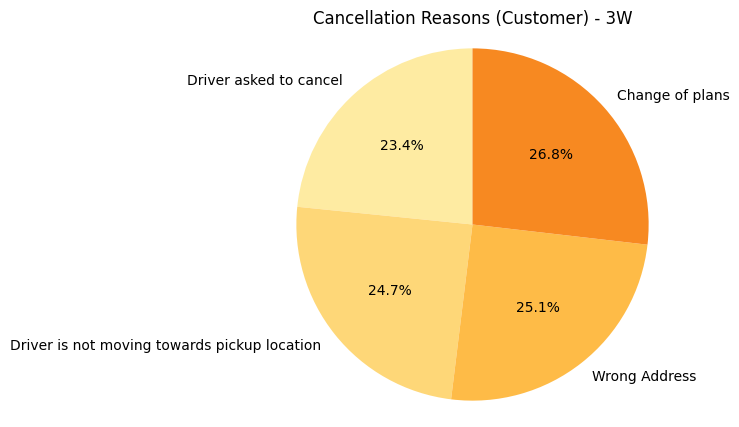

In [41]:
plt.figure(figsize=(5,5))
plt.pie(customer_cancel_3w.values, labels=customer_cancel_3w.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Cancellation Reasons (Customer) - 3W')
plt.axis('equal')
plt.show()

### 5.10.2 Cancellation Reasons (Customer) - 4W

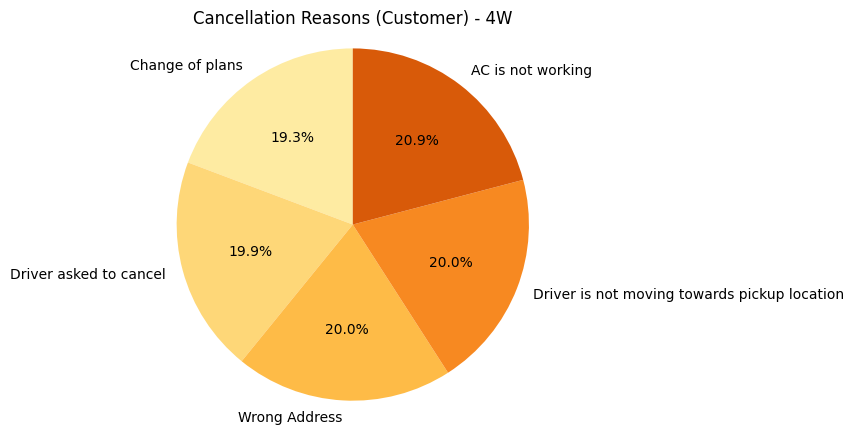

In [42]:
plt.figure(figsize=(5,5))
plt.pie(customer_cancel_4w.values, labels=customer_cancel_4w.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Cancellation Reasons (Customer) - 4W')
plt.axis('equal')
plt.show()

### 5.10.3 Cancellation Reasons (Customer) - 2W

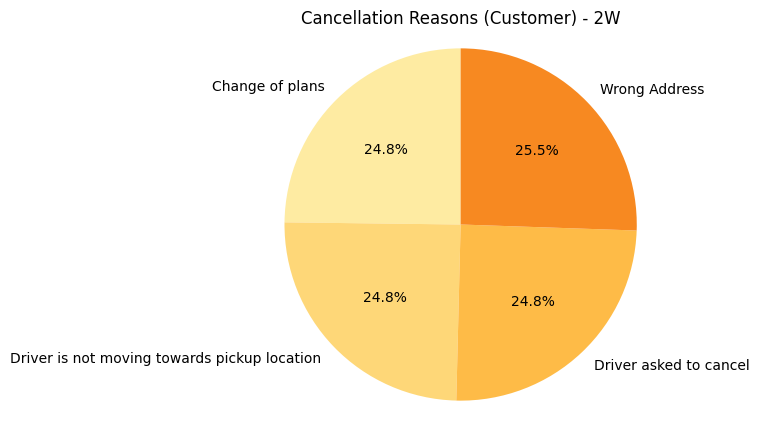

In [43]:
plt.figure(figsize=(5,5))
plt.pie(customer_cancel_2w.values, labels=customer_cancel_2w.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Cancellation Reasons (Customer) - 2W')
plt.axis('equal')
plt.show()

**Insight :**
- Alasan pembatalan pembokingan pelanggan paling banyak untuk roda tiga, adanya pergantian rencana sebanyak 26,8 % dari pembatalan pembokingan roda tiga
- Alasan pembatalan pembokingan pelanggan paling banyak untuk roda empat, adanya permasalahan dengan AC di kendaraan yang tidak berfungsi sebanyak 20,9% dari pembatalan pembokingan roda empat
- Alasan pembatalan pembokingan pelanggan paling banyak untuk roda dua, adanya kesalahan alamat yang dituju oleh pelanggan sendiri sebanyak 25,5 % dari pemabatalan pembokingan roda empat

Walaupun setiap angka presentasi tidak berbeda jauh dengan alasan lainnya, ini tetep perlu diperhatikan masalah pembatalannya, karena bisa merugikan performa bisnis uber , terutama untuk alasannya "AC is not working" dan "Driver is not moving towards pickup location", itu bisa menjadi penurunan kepercayaan pelanggan uber karena uber bisa dianggap tidak disiplin dan fasilitas yang kurang

## 5.11 Reasons for Incomplete Rides

In [44]:
incomplete_3w = Cancel_3W['Incomplete Rides Reason'].value_counts().sort_values(ascending=True)
display(incomplete_3w)

incomplete_2w = Cancel_2W['Incomplete Rides Reason'].value_counts().sort_values(ascending=True)
display(incomplete_3w)

incomplete_4w = Cancel_4W['Incomplete Rides Reason'].value_counts().sort_values(ascending=True)
display(incomplete_4w)

,count
Incomplete Rides Reason,
Vehicle Breakdown,740
Other Issue,742
Customer Demand,778


,count
Incomplete Rides Reason,
Vehicle Breakdown,740
Other Issue,742
Customer Demand,778


,count
Incomplete Rides Reason,
Other Issue,1585
Vehicle Breakdown,1594
Customer Demand,1603


### 5.11.1 Incomplete Ride Reasons – 4W

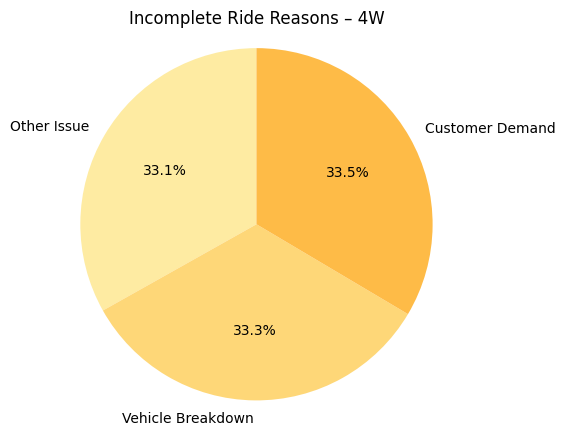

In [45]:
plt.figure(figsize=(5,5))
plt.pie(incomplete_4w.values, labels=incomplete_4w.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Incomplete Ride Reasons – 4W")
plt.axis('equal')
plt.show()

### 5.11.2 Incomplete Ride Reasons – 4W

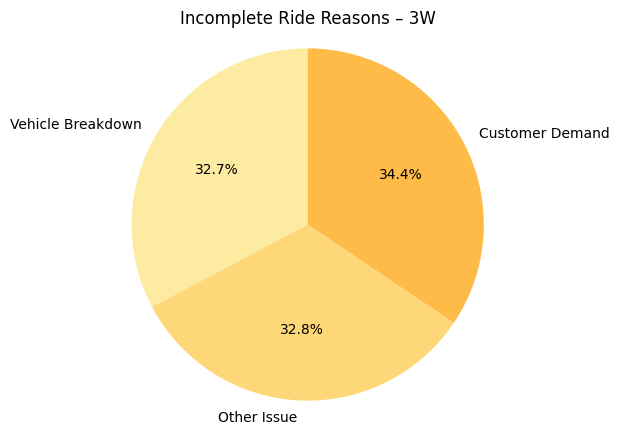

In [46]:
plt.figure(figsize=(5,5))
plt.pie(incomplete_3w.values, labels=incomplete_3w.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Incomplete Ride Reasons – 3W")
plt.axis('equal')
plt.show()

### 5.11.3 Incomplete Ride Reasons – 2W

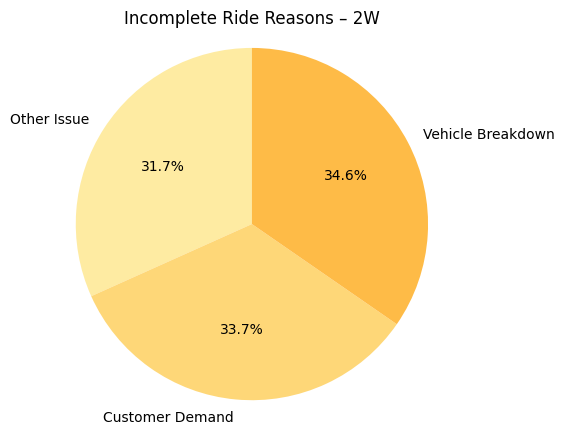

In [47]:
plt.figure(figsize=(5,5))
plt.pie(incomplete_2w.values, labels=incomplete_2w.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Incomplete Ride Reasons – 2W")
plt.axis('equal')
plt.show()

**Insight :**
- Alasan perjalanan tidak selesai paling banyak untuk roda 4 adalah permintaan pelanggan sebanyak 33,5 %
- Alasan perjalanan tidak selesai paling banyak untuk roda 3 adalah permintaan pelanggan sebanyak 34,8 %
- Alasan perjalanan tidak selesai paling banyak untuk roda 2 adalah kendaraan roda dua 2 yang tiba tiba mengalami kemogokan 34,6 %

Dari ketiga visualisasi tersebut dapat melihat, bahwa beberapa alasan pada setiap kendaraan tetap perlu harus diperhatikan karena ini berpengaruh pada performa bisnis uber. Pihak dari Uber juga harus memparhatikan masalah kendaaran yang tiba tiba rusak, karena ini dapat menyebabkan perjalanan tidak sesuai keinginan pelanggan.

# 6. Conculsion

Sepanjang tahun 2024, performa bisnis Uber secara umum menunjukkan hasil yang positif. Uber berhasil memberikan berbagai pilihan tipe kendaraan (2W, 3W, dan 4W) yang sesuai dengan kebutuhan pelanggan, dengan rata-rata rating yang cukup baik baik untuk kendaraan maupun pengemudinya. Hal ini mencerminkan kualitas layanan yang cukup terjaga di berbagai segmen.

Namun demikian, analisis tren revenue dan jumlah pembookingan menunjukkan adanya fluktuasi yang cukup signifikan dari bulan ke bulan. Setelah dilakukan diagnostic lebih lanjut, salah satu faktor utama penyebab ketidakstabilan tersebut adalah tingginya angka pembatalan perjalanan. Alasan pembatalan bervariasi, mulai dari keluhan pelanggan terhadap kendaraan atau pengemudi, hingga faktor eksternal yang menyebabkan perjalanan tidak selesai (misalnya masalah teknis kendaraan, kondisi lalu lintas, atau komunikasi dengan pelanggan).

Dengan demikian, meskipun secara keseluruhan Uber telah mampu mempertahankan layanan dengan kualitas baik dan demand yang tinggi, keberlanjutan pertumbuhan revenue sangat bergantung pada upaya mengurangi tingkat pembatalan, meningkatkan keandalan layanan, serta menjaga pengalaman pelanggan agar lebih konsisten dari waktu ke waktu.


# 7. Export Dataset

In [48]:
# df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace(r"[^a-zA-Z0-9_]", "", regex=True)
# df.to_csv("uber_clean.csv", index=False, encoding="utf-8")`